# aapineda

# River Flow Forecasting: A Hybrid Approach Integrating Machine Learning and Linear Time Series Models

![Alt text](1024px-Rio_Magdalena_Delta_landsat.jpg)

## **Resumen**


La precisa estimación del caudal del río Magdalena en la estación de Calamar, Bolívar, es esencial para la gestión de recursos hídricos y la reducción de riesgos de inundaciones en esta región. En este estudio, se emplearon tres enfoques de modelado para estimar el caudal del río a largo plazo (mensuales).
Los datos necesarios para este análisis fueron recopilados específicamente en la estación de monitoreo de Calamar, Bolívar, a lo largo del río Magdalena. Se examinaron tres enfoques de modelado: modelos autoregresivos (AR), modelos de promedio móvil (MA) y modelos autoregresivos de promedio móvil (ARMA). Los resultados revelaron que los modelos MA superaron consistentemente en rendimiento a los modelos AR y ARMA.
Además, para mejorar la precisión en la estimación del caudal del río Magdalena, se exploraron modelos de aprendizaje automático. Específicamente, se utilizaron Bosques Aleatorios (RF) y Splines de Regresión Adaptativos Multivariados (MARS) para estimar los valores mensuales de un factor crítico, el caudal del Rio, basándose en datos del Caudal del periodo anterior. Los resultados revelaron que RF y MARS produjeron estimaciones comparables, con RF mostrando una ligera ventaja en el rendimiento.
Posteriormente, se implementaron modelos híbridos que combinaron enfoques de series temporales y aprendizaje automático, como RF-AR, RF-MA, RF-ARMA, MARS-AR, MARS-MA y MARS-ARMA, con el objetivo de mejorar la precisión en la estimación del Caudal. Entre estos modelos híbridos, RF-AR y MARS-AR demostraron consistentemente un rendimiento sobresaliente.
Los resultados de este estudio sugieren que la combinación de enfoques híbridos, que integran modelos de series temporales y aprendizaje automático, ofrece un enfoque prometedor para estimar el Caudal en la estación de Calamar, Bolívar, a lo largo del río Magdalena. Estas estimaciones precisas del Caudal tienen aplicaciones significativas en proyectos relacionados con el analisis de Riesgo, planificacion de dragados y Energia hidroelectrica.

* Palabras clave: Río Magdalena · Estimación · Modelos de Series Temporales · Modelos de Aprendizaje Automático · Modelos Independientes y Híbridos · Caudales.

## **Metodología**

**Población y Muestra:**
- Población: La población de interés consistió en todos los datos históricos de caudales disponibles para la estación de Calamar, Bolívar, a lo largo del río Magdalena. (1984-2020)
- Muestra: La muestra se seleccionó considerando el tiempo y el espacio, incluyendo datos diarios recopilados a lo largo de varios años específicos. La muestra se limitó a la estación de Calamar, Bolívar.

**Variables:**
Se definió un diccionario de características que incluyó las siguientes variables:
- Caudal del río Magdalena (variable objetivo).
- Variables meteorológicas adicionales (si es necesario).
- Fechas y marcas temporales para el análisis de series temporales.

**Técnicas:**
Se emplearon diversas técnicas para la estimación del caudal del río Magdalena, que se dividieron en dos categorías principales:

**a. Modelos de Series Temporales:**
- Modelos AR (Autoregresivos).
- Modelos MA (Promedio Móvil).
- Modelos ARMA (Autoregresivos de Promedio Móvil).

**b. Modelos de Aprendizaje Automático:**
- Bosques Aleatorios (RF).
- Splines de Regresión Adaptativos Multivariados (MARS).
Además, se aplicaron modelos híbridos que combinaron enfoques de series temporales y aprendizaje automático, como RF-AR y MARS-AR.

**Diseño General:**
El estudio siguió un diseño de investigación observacional retrospectiva. Se recopilaron datos históricos de caudales del río Magdalena en la estación de Calamar, Bolívar, así como datos de velocidad del viento y, en su caso, datos meteorológicos adicionales. Estos datos retrospectivos se analizaron para desarrollar modelos de estimación del caudal del río.

**Validez:**
La validez del estudio se abordó de la siguiente manera:
- Grupos de Datos Coherentes: Se utilizaron datos coherentes y homogéneos recopilados de manera consistente a lo largo del tiempo.
- Automatizado: La obtención de datos se automatizó mediante la extracción de datos desde fuentes como archivos CSV y, en su caso, API o consultas SQL.
- Técnicas Estadísticas: Se aplicaron pruebas estadísticas como Chi cuadrado, T-Students, Prueba Fisher y análisis de autocorrelación para evaluar la validez y la robustez de los modelos propuestos y los resultados del estudio.

Este enfoque metodológico riguroso garantiza la calidad y la confiabilidad de los resultados del estudio de estimación del caudal del río Magdalena en la estación de Calamar, Bolívar, y sienta las bases para la mejora de la gestión de recursos hídricos en esta región.


## Librerias Necesarias

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

## Errores
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Hola

## Dataset

In [2]:
import pandas as pd

# URL del archivo CSV en GitHub
#url = 'https://raw.githubusercontent.com/aapineda/data/main/Q_Station_25017010.csv'
url = 'https://raw.githubusercontent.com/aapineda/data/main/Q_Station_29037020.csv'

# Leer el archivo CSV desde la URL
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13515 entries, 0 to 13514
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13515 non-null  object 
 1   Flow    13515 non-null  float64
 2   ENSO    13515 non-null  float64
dtypes: float64(2), object(1)
memory usage: 316.9+ KB


In [4]:
df.head()

,Date,Flow,ENSO
0,1-01-1984,7803.0,-0.6
1,2-01-1984,7718.0,-0.6
2,3-01-1984,7634.0,-0.6
3,4-01-1984,7554.0,-0.6
4,5-01-1984,7498.0,-0.6


In [5]:
df.describe()

,Flow,ENSO
count,13515.000000,13515.000000
mean,7239.553703,-0.003492
std,2708.667922,0.850624
min,2011.900000,-1.800000
25%,5177.200000,-0.600000
50%,6987.000000,-0.100000
75%,9157.050000,0.500000
max,14909.000000,2.600000


In [6]:

# Asegúrate de que la columna 'fecha' sea de tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')


# Agrupa los datos por mes y calcula el promedio
serie = df.groupby(df['Date'].dt.to_period('M')).mean()

serie.drop(serie.columns[0], axis=1, inplace=True)

serie = serie.reset_index(drop=True)

# La variable promedio_por_mes ahora contiene el promedio de 'valor' por mes
print(serie)


             Flow  ENSO
0     7046.387097  -0.6
1     5769.344828  -0.4
2     5016.483871  -0.3
3     4613.266667  -0.4
4     6783.838710  -0.5
..            ...   ...
439   7277.535484  -0.6
440   8679.066667  -0.9
441   9349.567742  -1.2
442   9804.350000  -1.3
443  10353.732258  -1.2

[444 rows x 2 columns]


In [8]:
serie

,Flow,ENSO
0,7046.387097,-0.6
1,5769.344828,-0.4
2,5016.483871,-0.3
3,4613.266667,-0.4
4,6783.838710,-0.5
...,...,...
439,7277.535484,-0.6
440,8679.066667,-0.9
441,9349.567742,-1.2
442,9804.350000,-1.3


In [7]:
serie['Mes'] = range(1, len(serie) + 1) #PREDECIR CON MESES

In [8]:
serie['Flow_lag'] = serie['Flow'].shift(1)

In [9]:
serie.at[0, 'Flow_lag'] = 7490.387


In [10]:
serie

,Flow,ENSO,Mes,Flow_lag
0,7046.387097,-0.6,1,7490.387000
1,5769.344828,-0.4,2,7046.387097
2,5016.483871,-0.3,3,5769.344828
3,4613.266667,-0.4,4,5016.483871
4,6783.838710,-0.5,5,4613.266667
...,...,...,...,...
439,7277.535484,-0.6,440,6987.390323
440,8679.066667,-0.9,441,7277.535484
441,9349.567742,-1.2,442,8679.066667
442,9804.350000,-1.3,443,9349.567742


In [11]:
serie_ARIMA=serie.copy()
serie_ARIMA.drop(serie_ARIMA.columns[[1, 3]], axis=1, inplace=True)

In [12]:
serie_ARIMA

,Flow,Mes
0,7046.387097,1
1,5769.344828,2
2,5016.483871,3
3,4613.266667,4
4,6783.838710,5
...,...,...
439,7277.535484,440
440,8679.066667,441
441,9349.567742,442
442,9804.350000,443


### Auto Correlation function (ACF) and Partial Autocorrelation Funcion(PACF).

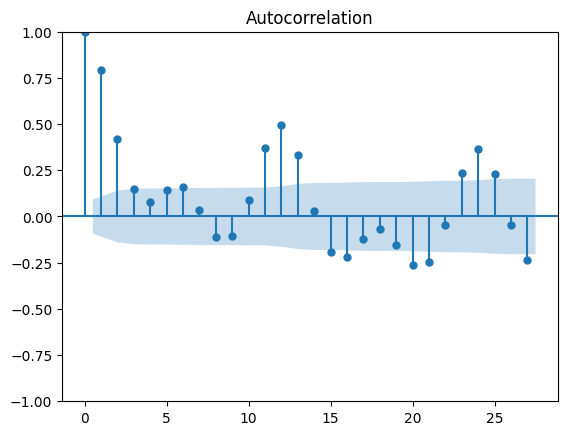

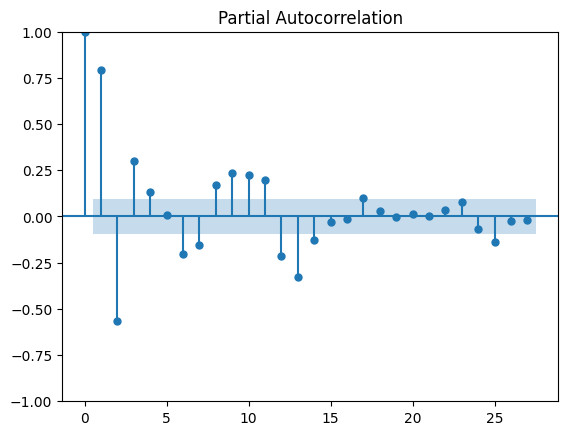

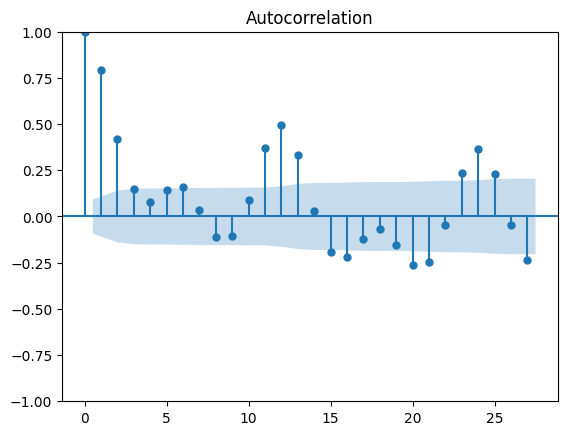

In [13]:
plot_pacf(serie_ARIMA['Flow'])
plot_acf(serie_ARIMA['Flow'])

In [14]:
#Function to know stacionality

def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios (Stationary)")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos son no estacionarios (Non Stationary)")

In [15]:
Prueba_Dickey_Fuller(serie_ARIMA['Flow'],"Flow")

Resultados de la prueba de Dickey-Fuller para columna: Flow
Test Statistic                         -5.555584
p-value                                 0.000002
No Lags Used                           13.000000
Número de observaciones utilizadas    430.000000
Critical Value (1%)                    -3.445649
Critical Value (5%)                    -2.868285
Critical Value (10%)                   -2.570363
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios (Stationary)


In [16]:
# Convertir 'Flow' y 'Mes' en arreglos NumPy y luego aplicar reshape
"""target = serie['Flow'].values.reshape(-1, 1)
data = serie['Mes'].values.reshape(-1, 1)"""

"target = serie['Flow'].values.reshape(-1, 1)\ndata = serie['Mes'].values.reshape(-1, 1)"

### Datos de Entrenamiento y Prueba

In [51]:
data_train = serie[serie.Mes < 356]
data_test  = serie[serie.Mes >= 356]

In [52]:
#X_train = np.array(data_train.Mes)[:, None] # vector-columna

#X_train = np.array(data_train[['Mes', 'ENSO']])
X_train = np.array(data_train[['Flow_lag']])
y_train = np.array(data_train.Flow)

#X_test = np.array(data_test.Mes)[:, None] # vector-columna
X_test = np.array(data_test[['Flow_lag']])
y_test = np.array(data_test.Flow)

## Metricas

In [53]:
# Calculo de Metricas
def metricas(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

    # Calcular el RRMSE directamente
    rrmse = np.sqrt(np.mean((y_test - y_pred) ** 2)) / np.mean(y_test)
    print(f"RRMSE: {rrmse:.2f}")

    # Calcular R-squared
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R^2): {r2:.2f}")

    # Calcular el NSE (coeficiente de eficiencia Nash-Sutcliffe)
    nse = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
    print(f"NSE (Nash-Sutcliffe Efficiency): {nse:.2f}")


## ARIMA

Test RMSE: 1243.934


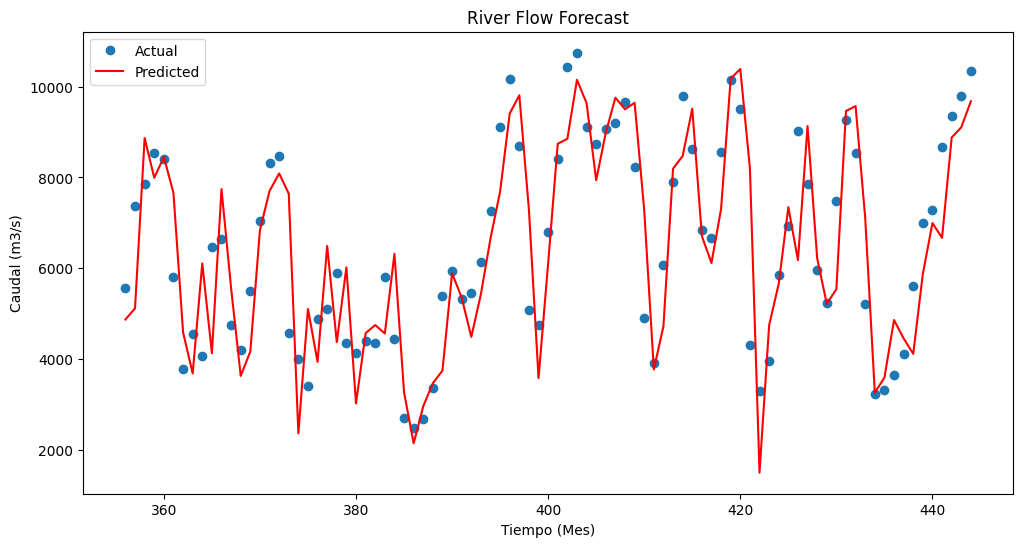

In [19]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

# Load dataset

# Split into train and test sets
X = serie_ARIMA['Flow'].values
size = int(len(X) * 0.8)
train, test = X[:size], X[size:]



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  355
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -3036.764
Date:                Sat, 23 Sep 2023   AIC                           6085.529
Time:                        22:36:10   BIC                           6108.761
Sample:                             0   HQIC                          6094.771
                                - 355                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7413.0301    372.462     19.903      0.000    6683.019    8143.041
ar.L1          1.4195      0.056     25.131      0.000       1.309       1.530
ar.L2         -0.8904      0.095     -9.405      0.0

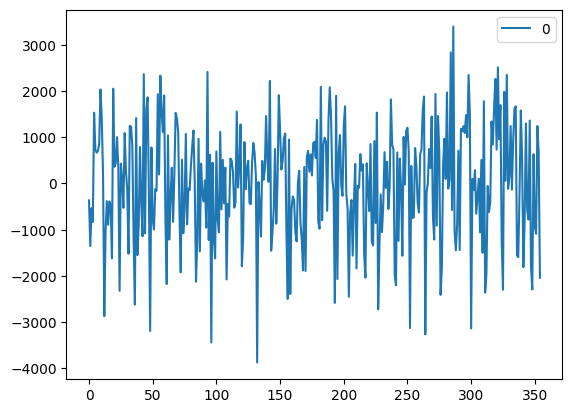

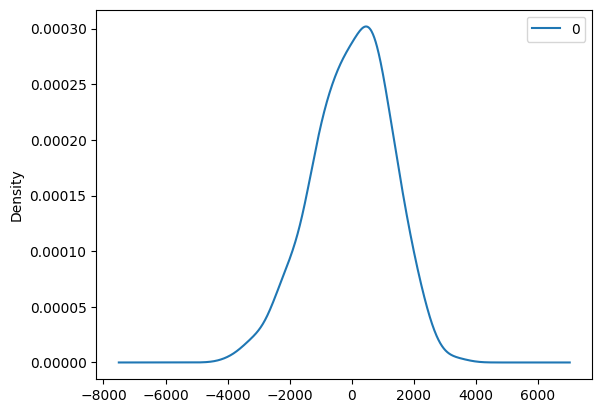

                 0
count   355.000000
mean     -6.069262
std    1254.394181
min   -3871.151821
25%    -841.899311
50%      79.394176
75%     875.081434
max    3396.234225


In [20]:
# fit model
model = ARIMA(train, order=(4,0,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

Test RMSE: 1243.934


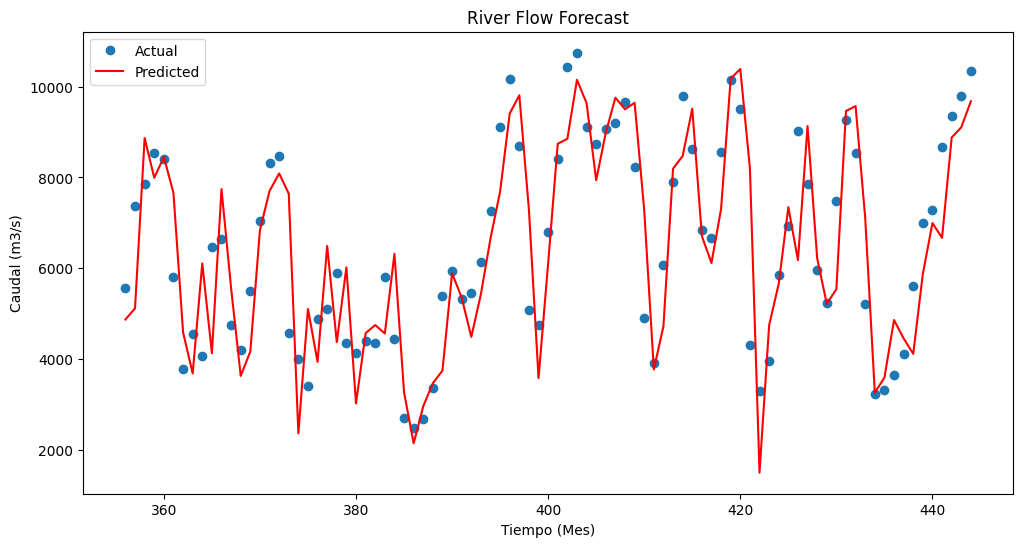

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load dataset

# Split into train and test sets
X = serie_ARIMA['Flow'].values
size = int(len(X) * 0.8)
train, test = X[:size], X[size:]

history = [x for x in train]
predictions = []


# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('Month=%s, Predicted=%f, Expected=%f' % (serie_ARIMA['Mes'].iloc[size + t], yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
fig = plt.figure(figsize=(12, 6))
plt.plot(serie_ARIMA['Mes'].iloc[size:], test, marker='o', linestyle='', label='Actual')
plt.plot(serie_ARIMA['Mes'].iloc[size:], predictions, color='red', label='Predicted')
plt.xlabel('Tiempo (Mes)')
plt.ylabel('Caudal (m3/s)')
plt.legend()
plt.title('River Flow Forecast')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.show()


### Funcion ARIMA

In [22]:
def ARIMA_estimador(p_values, d_values, q_values, test, train):
    best_rmse = float('inf')
    best_order = None

    # Create a DataFrame to store results
    results = []
    residuales=[]

    # Perform grid search over all possible combinations
    for p, d, q in product(p_values, d_values, q_values):
        order = (p, d, q)
        history = [x for x in train]
        predictions = []

        # Walk-forward validation
        for t in range(len(test)):
            model = ARIMA(history, order=order)
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)

        # Calculate RMSE
        rmse = sqrt(mean_squared_error(test, predictions))

        # Store results
        results.append({'Order': order, 'RMSE': rmse})
    
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)

    # Sort the DataFrame by RMSE (ascending order for ranking)
    results_df = results_df.sort_values(by='RMSE')

    # Print the ranking
    print('ARIMA Model Ranking:')
    print(results_df)

    # Plot forecasts against actual outcomes using the best parameters
    best_order = results_df.iloc[0]['Order']
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        residuales.append(obs-yhat)

    fig = plt.figure(figsize=(12, 6))
    plt.plot(serie_ARIMA['Mes'].iloc[size:], test, marker='o', linestyle='', label='Actual')
    plt.plot(serie_ARIMA['Mes'].iloc[size:], predictions, color='red', label='Predicted')
    plt.xlabel('Tiempo (Mes)')
    plt.ylabel('Caudal (m3/s)')
    plt.legend()
    plt.title('River Flow Forecast')
    plt.xticks(rotation=0)
    plt.show()
    
    return predictions, residuales


## Modelos lineales
Entre los modelos lineales se encuentran: autoregressive (AR), moving average (MA), and autoregressive moving average (ARMA)

### AR

ARIMA Model Ranking:
       Order         RMSE
4  (4, 0, 0)  1215.379453
5  (5, 0, 0)  1216.840257
3  (3, 0, 0)  1238.010408
2  (2, 0, 0)  1280.947522
1  (1, 0, 0)  1471.127505
0  (0, 0, 0)  2371.195732


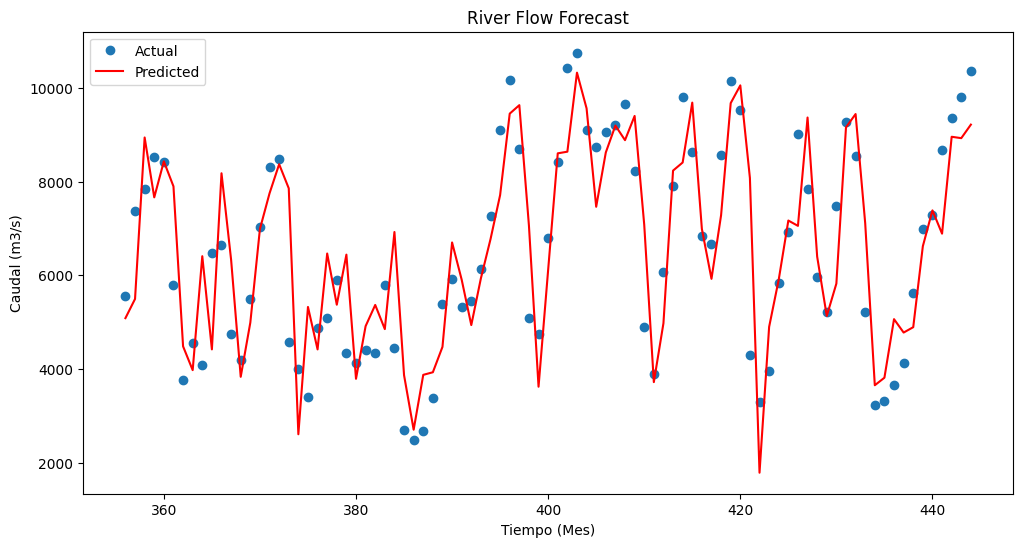

In [23]:
# Define a range of ARIMA hyperparameters to search over
p_values = range(0, 6)
d_values = range(0, 1)
q_values = range(0, 1)

predictions_AR, residuales_AR = ARIMA_estimador(p_values, d_values, q_values, test, train)


In [46]:
metricas(test, predictions_AR)

RMSE: 1215.38
MAE: 967.50
RRMSE: 0.19
R-squared (R^2): 0.70
NSE (Nash-Sutcliffe Efficiency): 0.70


### MA

ARIMA Model Ranking:
       Order         RMSE
5  (0, 0, 5)  1217.828665
4  (0, 0, 4)  1228.662025
2  (0, 0, 2)  1259.947042
3  (0, 0, 3)  1291.599212
1  (0, 0, 1)  1595.246397
0  (0, 0, 0)  2371.195732


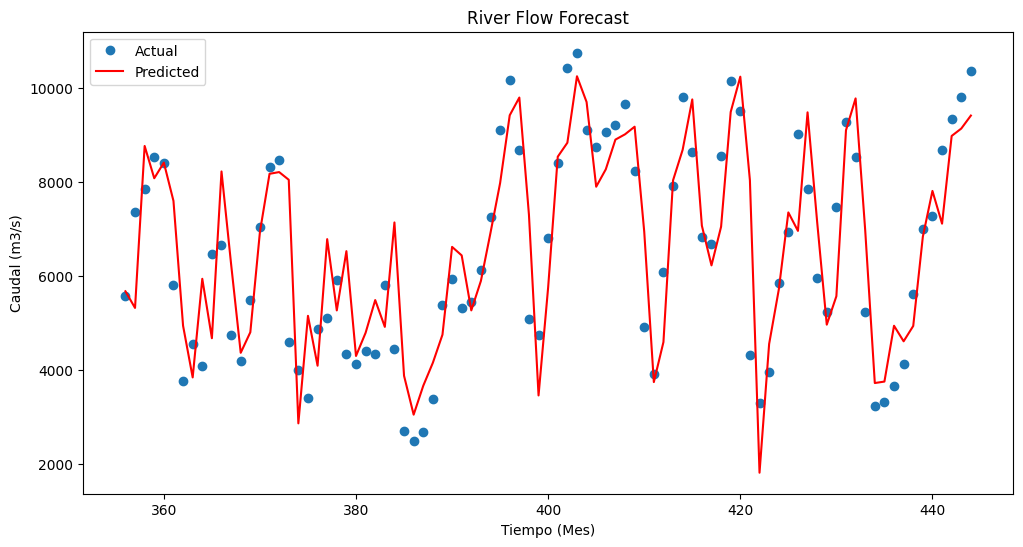

In [28]:
# Define a range of ARIMA hyperparameters to search over
p_values = range(0, 1)
d_values = range(0, 1)
q_values = range(0, 6)

ARIMA_estimador(p_values, d_values, q_values, test, train)

### ARMA

In [30]:
"""# Define a range of ARIMA hyperparameters to search over
p_values = range(0, 6)
d_values = range(0, 1)
q_values = range(0, 6)

ARIMA_estimador(p_values, d_values, q_values, test, train)"""

'# Define a range of ARIMA hyperparameters to search over\np_values = range(0, 6)\nd_values = range(0, 1)\nq_values = range(0, 6)\n\nARIMA_estimador(p_values, d_values, q_values, test, train)'

## Naive Bayes

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [241]:
tree = RandomForestRegressor().fit(X_train, y_train)

#X_all = np.array(serie[['Mes', 'ENSO']])
X_all = np.array(serie[['Flow_lag']])
y_all = np.array(serie.Flow)
pred_tree = tree.predict(X_all)

flow_tree = (pred_tree)


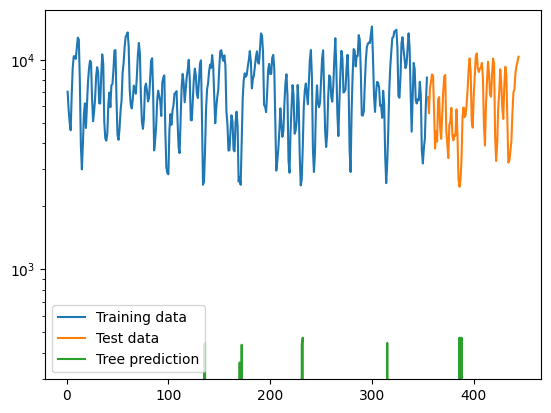

In [242]:
plt.semilogy(data_train.Mes, data_train.Flow, label="Training data")
plt.semilogy(data_test.Mes, data_test.Flow, label="Test data")
plt.semilogy(serie.Mes, flow_tree, label="Tree prediction")
plt.legend();

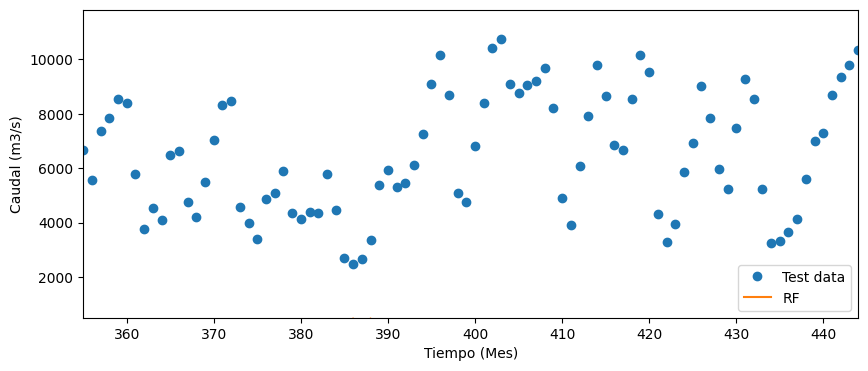

In [268]:
fig = plt.figure(figsize=(10, 4))
plt.plot(data_test.Mes, data_test.Flow, marker='o', linestyle='', label="Test data")
plt.plot(serie.Mes, flow_tree, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y

plt.xlim(data_test.Mes.min(), data_test.Mes.max())
plt.ylim(500, max(data_test.max())*1.1)

plt.show()

### Con Pipeline

In [72]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
param_grid = {'randomforestregressor__max_depth': [2,3,4],
              'randomforestregressor__n_estimators': [400],
              'randomforestregressor__max_leaf_nodes': [2,4,6,8],
              'randomforestregressor__min_samples_split': [2,5,10,15]}

RF = GridSearchCV(pipe, param_grid, scoring='r2', cv=3, n_jobs=-1)
RF.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [2, 3, 4],
                         'randomforestregressor__max_leaf_nodes': [2, 4, 6, 8],
                         'randomforestregressor__min_samples_split': [2, 5, 10,
                                                                      15],
                         'randomforestregressor__n_estimators': [400]},
             scoring='r2')

In [73]:
print("Best estimator:\n{}".format(RF.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, max_leaf_nodes=6,
                                       min_samples_split=15,
                                       n_estimators=400))])


In [74]:
print("Training-set score: {:.2f}".format(RF.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(RF.score(X_test, y_test)))


Training-set score: 0.66
Test-set score: 0.52


In [79]:
res_RF_train = y_train-RF.predict(X_train)

y_pred = RF.predict(X_test)
res_RF_test= y_test-y_pred

### Metricas

In [80]:
# Calculo de Metricas

metricas(y_test, y_pred)


RMSE: 1537.05
MAE: 1210.72
RRMSE: 0.24
R-squared (R^2): 0.52
NSE (Nash-Sutcliffe Efficiency): 0.52


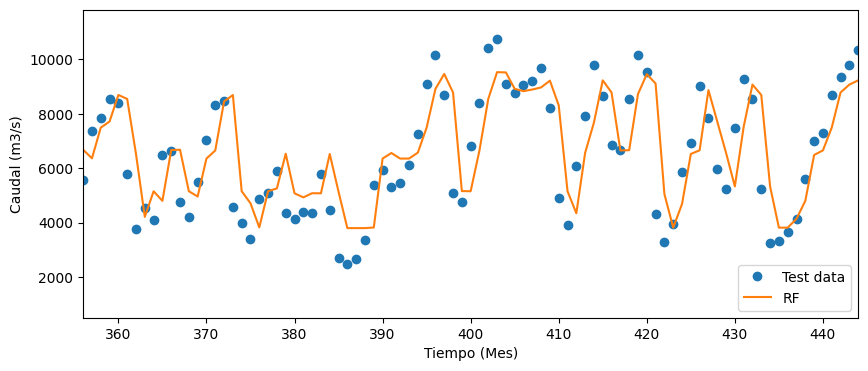

In [81]:
fig = plt.figure(figsize=(10, 4))
plt.plot(data_test.Mes, y_test, marker='o', linestyle='', label="Test data")
plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y

plt.xlim(data_test.Mes.min(), data_test.Mes.max())
plt.ylim(500, max(data_test.max())*1.1)

plt.show()

## k-NN regresor

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

### Pipeline

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

In [73]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [74]:
param_grid = {'kneighborsregressor__n_neighbors': [1,2,4,6,8,10,15,20,30,40]}

In [75]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__n_neighbors': [1, 2, 4, 6, 8, 10,
                                                              15, 20, 30, 40]},
             scoring='r2')

In [76]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=30))])


In [77]:
y_pred = grid.predict(X_test)

In [78]:
print("Training-set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Training-set score: 0.64
Test-set score: 0.51


In [79]:
# Calculo de Metricas

metricas(y_test, y_pred)


RMSE: 1546.60
MAE: 1245.77
RRMSE: 0.24
R-squared (R^2): 0.51
NSE (Nash-Sutcliffe Efficiency): 0.51


## SVR

In [58]:
from sklearn.svm import SVR

In [68]:
param_grid = {'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [69]:
pipe = make_pipeline(MinMaxScaler(), SVR())

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [70]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svr', SVR(C=100, gamma=10))])


In [71]:
y_pred = grid.predict(X_test)

In [72]:
# Calculo de Metricas

metricas(y_test, y_pred)


RMSE: 1575.92
MAE: 1261.02
RRMSE: 0.24
R-squared (R^2): 0.49
NSE (Nash-Sutcliffe Efficiency): 0.49


There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

## Multi Linear Regression (MLR)

## Modelo Hibrido


### Random Forest con modelos lineales 
Entre los modelos lineales se encuentran: autoregressive (AR), moving average (MA), and autoregressive moving average (ARMA)

Para medir el rendimiento de todos los modelos desarrollados de manera cualitativa, los valores de RRMSE (Error Cuadrático Medio Raíz Relativo) se categorizaron de la siguiente manera:
* Excelente: 0% < RRMSE < 10%
* Bueno: 10% < RRMSE < 20%
* Regular: 20% < RRMSE < 30%
* Malo: RRMSE > 30%


### AR-RF

In [55]:
residuales_AR = np.array(residuales_AR).reshape(-1,1)

residuales_AR_lag = np.roll(residuales_AR, shift=1)

In [56]:
residuales_AR_lag

array([[ 1138.1789497 ],
       [  479.64853175],
       [ 1875.62846663],
       [-1090.49451822],
       [  872.27986086],
       [  -23.51719623],
       [-2100.99820263],
       [ -712.03647499],
       [  576.57699598],
       [-2331.41104205],
       [ 2057.73743855],
       [-1529.45657042],
       [-1586.96839846],
       [  364.84152696],
       [  505.01424462],
       [   50.24035854],
       [  572.56300794],
       [  106.09237073],
       [-3273.91154347],
       [ 1383.54748087],
       [-1924.07563634],
       [  459.97907001],
       [-1366.72434855],
       [  533.21925097],
       [-2098.94535817],
       [  337.07577351],
       [ -519.31422184],
       [-1022.94962498],
       [  951.96921267],
       [-2478.8373476 ],
       [-1178.77194513],
       [ -224.42208208],
       [-1197.14923527],
       [ -559.97100394],
       [  911.66269504],
       [ -770.52957922],
       [ -582.23046436],
       [  513.1101604 ],
       [  193.99907818],
       [  485.51545507],


Text(0, 0.5, 'Caudal (m3/s)')

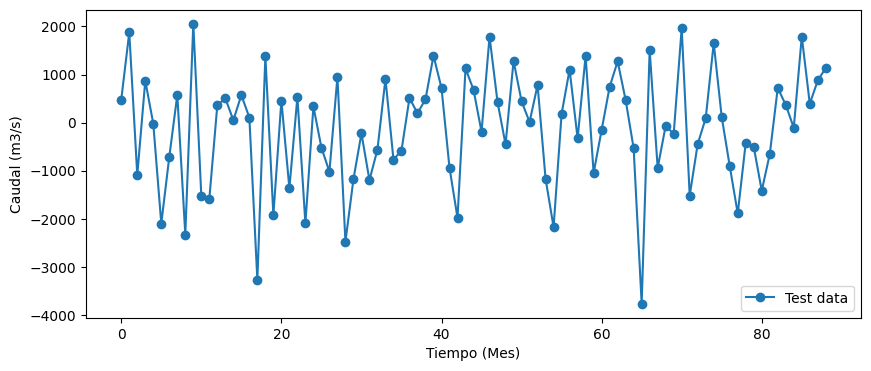

In [57]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuales_AR, marker='o', label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y


In [58]:
best_order = (4, 0, 0)
history = [x for x in train]
model = ARIMA(history, order=best_order)
model_fit = model.fit()

residuals_train = model_fit.resid

residuales_train_lag = np.roll(residuals_train, shift=1)

Text(0, 0.5, 'Caudal (m3/s)')

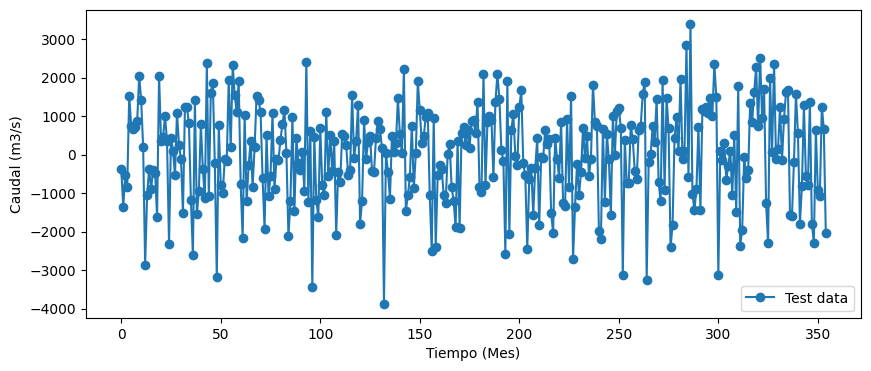

In [50]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuals_train, marker='o', label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y



In [60]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
param_grid = {'randomforestregressor__max_depth': [2,3,4],
              'randomforestregressor__n_estimators': [100],
              'randomforestregressor__max_leaf_nodes': [2,4,6,8],
              'randomforestregressor__min_samples_split': [2,5,10,15]}

RF_e = GridSearchCV(pipe, param_grid, scoring='r2', cv=3, n_jobs=-1)
RF_e.fit(residuales_train_lag.reshape(-1, 1), residuals_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [2, 3, 4],
                         'randomforestregressor__max_leaf_nodes': [2, 4, 6, 8],
                         'randomforestregressor__min_samples_split': [2, 5, 10,
                                                                      15],
                         'randomforestregressor__n_estimators': [100]},
             scoring='r2')

In [61]:
print("Best estimator:\n{}".format(RF_e.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=2, max_leaf_nodes=2,
                                       min_samples_split=15))])


In [64]:
print("Training-set score: {:.2f}".format(RF_e.score(residuales_train_lag.reshape(-1,1), residuals_train)))
print("Test-set score: {:.2f}".format(RF_e.score(residuales_AR_lag.reshape(-1,1), residuales_AR)))


Training-set score: 0.01
Test-set score: -0.01


In [42]:
y_residual = RF_e.predict(residuales_AR.reshape(-1,1))

y_AR_RF = predictions_AR + y_residual


In [43]:
print(y_residual)

[-729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.78551872 -729.78551872 -729.78551872 -729.78551872 -729.78551872
 -729.

In [44]:
metricas(test, y_AR_RF)

RMSE: 1353.97
MAE: 1136.20
RRMSE: 0.21
R-squared (R^2): 0.63
NSE (Nash-Sutcliffe Efficiency): 0.63


In [171]:
print(len(y_test))

89


In [158]:
print(len(X_train))

354


In [159]:
print(len(y_train))

354


In [180]:
# Quitar el primer valor de la serie X_train y el último valor de la serie y_train
X_train = X_train[:-1].reshape(-1,1)
y_train = y_train[1:].reshape(-1,1)
X_test = X_test[:-1].reshape(-1,1)
y_test = y_test[1:].reshape(-1,1)

In [181]:
y_test

array([[ 1955.19625364],
       [-1012.60636663],
       [  851.02158416],
       [   76.65772688],
       [-2070.95428551],
       [ -733.48352369],
       [  605.16291821],
       [-2291.02939031],
       [ 2009.03538006],
       [-1394.26057869],
       [-1564.99709133],
       [  418.62192295],
       [  562.17947781],
       [   76.12736525],
       [  609.944766  ],
       [  177.52284558],
       [-3222.40810817],
       [ 1356.4499793 ],
       [-1848.55826571],
       [  440.74940798],
       [-1321.93452574],
       [  566.51222575],
       [-2050.61304222],
       [  365.07006369],
       [ -509.93239588],
       [-1007.35067873],
       [  967.72799783],
       [-2463.99754189],
       [-1142.95755289],
       [ -238.91938846],
       [-1220.50247076],
       [ -582.08674367],
       [  882.18650184],
       [ -782.73899807],
       [ -579.70138538],
       [  497.75389198],
       [  173.55894514],
       [  473.62948845],
       [ 1387.87931813],
       [  728.26844935],


In [182]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
param_grid = {'randomforestregressor__max_depth': [2,3,4],
              'randomforestregressor__n_estimators': [100],
              'randomforestregressor__max_leaf_nodes': [2,4,6,8],
              'randomforestregressor__min_samples_split': [2,5,10,15]}

grid = GridSearchCV(pipe, param_grid, scoring='r2',cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [2, 3, 4],
                         'randomforestregressor__max_leaf_nodes': [2, 4, 6, 8],
                         'randomforestregressor__min_samples_split': [2, 5, 10,
                                                                      15],
                         'randomforestregressor__n_estimators': [100]},
             scoring='r2')

In [183]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=2, max_leaf_nodes=2,
                                       min_samples_split=5))])


In [184]:
print("Training-set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Training-set score: 0.02
Test-set score: -0.04


In [185]:
y_pred = grid.predict(X_test)
# Calculo de Metricas

metricas(y_test, y_pred)


RMSE: 1227.04
MAE: 970.64
RRMSE: -9.33
R-squared (R^2): -0.04
NSE (Nash-Sutcliffe Efficiency): -87.74


In [186]:
len(y_test)

87

In [187]:
len(data_test)

90

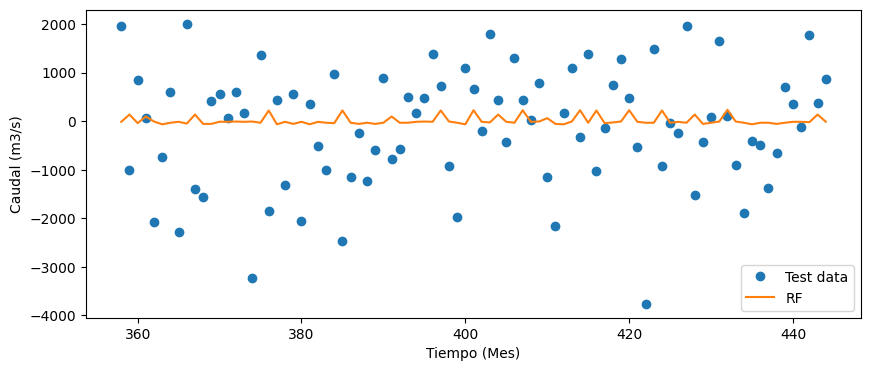

In [191]:
fig = plt.figure(figsize=(10, 4))
plt.plot(data_test.Mes[3:], y_test.reshape(-1,1), marker='o', linestyle='', label="Test data")
plt.plot(data_test.Mes[3:], y_pred.reshape(-1,1), label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y


plt.show()

In [230]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Carga tus datos de series temporales
# Por ejemplo, aquí generaremos datos aleatorios

data = X

# Divide los datos en entrenamiento y prueba
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Modelo ARIMA
order = (4, 0, 0)  # Parámetros p, d, q del ARIMA
model = ARIMA(train, order=order)
model_fit = model.fit()
arima_residuals = model_fit.resid  # Captura los residuales del ARIMA

# Modelo Random Forest para los residuales
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(train.reshape(-1, 1), arima_residuals)  # Usamos los residuales como objetivo

# Predicciones ARIMA
arima_predictions = model_fit.forecast(steps=len(test))[0]

# Predicciones Random Forest para los residuales
rf_residuals_predictions = rf_model.predict(test.reshape(-1, 1))

# Combinar predicciones sumando las predicciones ARIMA y los residuales de RF
combined_predictions = arima_predictions + rf_residuals_predictions

# Calcular el error RMSE
rmse = sqrt(mean_squared_error(test, combined_predictions))
print(f'RMSE: {rmse}')



metricas(test, combined_predictions)



RMSE: 2544.7167758416226
RMSE: 2544.72
MAE: 2063.87
RRMSE: 0.39
R-squared (R^2): -0.32
NSE (Nash-Sutcliffe Efficiency): -0.32


### RF-ARIMA

ARIMA Model Ranking:
       Order         RMSE
5  (5, 0, 0)  1302.741760
3  (3, 0, 0)  1312.532435
4  (4, 0, 0)  1314.385929
2  (2, 0, 0)  1350.958303
1  (1, 0, 0)  1441.203082
0  (0, 0, 0)  1536.043079


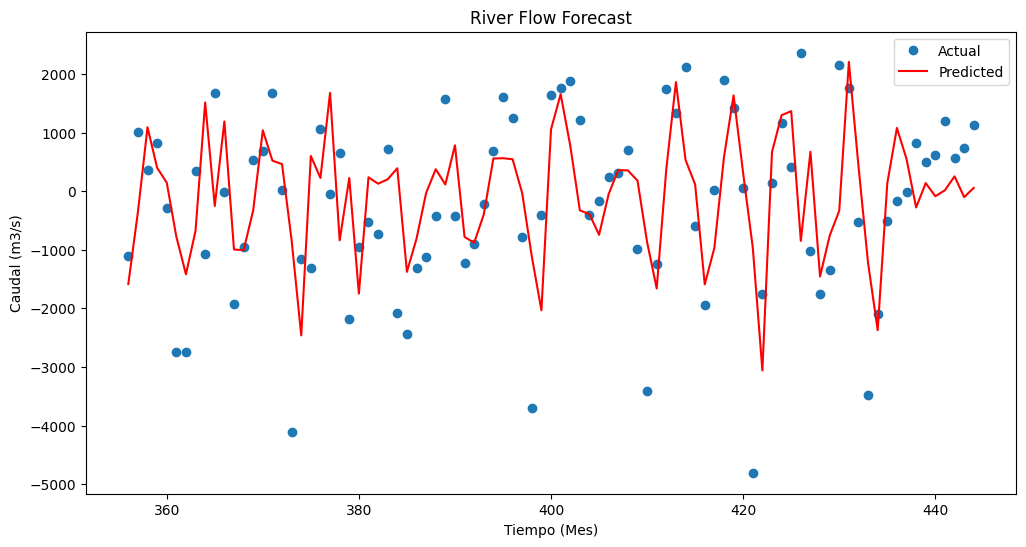

In [84]:
# Define a range of ARIMA hyperparameters to search over
p_values = range(0, 6)
d_values = range(0, 1)
q_values = range(0, 1)

predictions_AR_res, residuales_AR_res = ARIMA_estimador(p_values, d_values, q_values, res_RF_test, res_RF_train)

In [85]:
metricas(res_RF_test, predictions_AR_res)

RMSE: 1302.74
MAE: 1036.17
RRMSE: -6.23
R-squared (R^2): 0.27
NSE (Nash-Sutcliffe Efficiency): 0.27


In [88]:
y_RF_AR = y_pred + predictions_AR_res

In [89]:
metricas(y_test, y_RF_AR)

RMSE: 1302.74
MAE: 1036.17
RRMSE: 0.20
R-squared (R^2): 0.65
NSE (Nash-Sutcliffe Efficiency): 0.65


### RF-MA

ARIMA Model Ranking:
       Order         RMSE
5  (0, 0, 5)  1342.580391
3  (0, 0, 3)  1343.101171
4  (0, 0, 4)  1379.974746
2  (0, 0, 2)  1408.854264
1  (0, 0, 1)  1420.156195
0  (0, 0, 0)  1536.043079


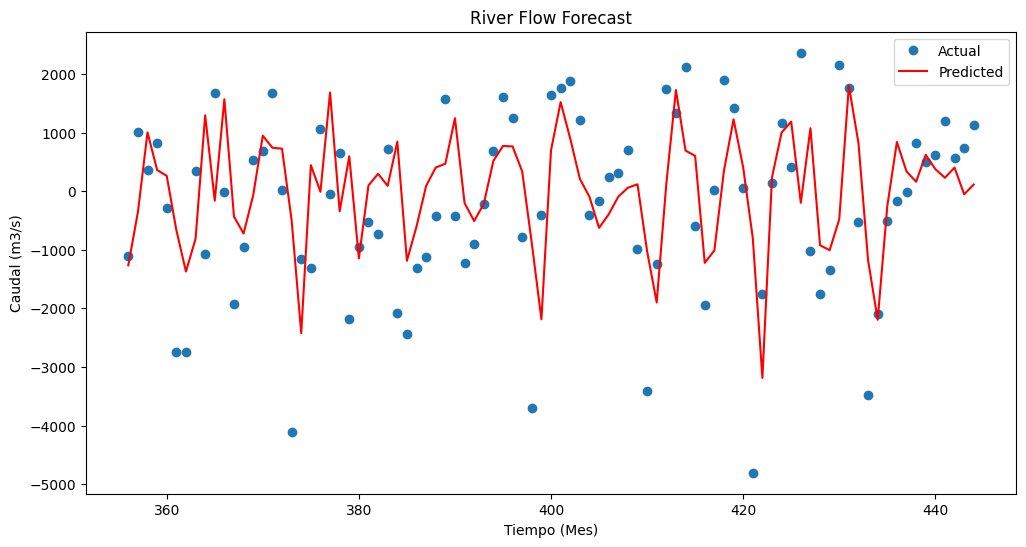

([-1265.1868717596933,
  -356.548880856113,
  1004.0812231036487,
  360.85901164189784,
  261.3694072470515,
  -662.7774308425016,
  -1371.9435389447788,
  -814.2634013589495,
  1295.386532602458,
  -163.9943731817499,
  1569.3371022813303,
  -434.0185620066566,
  -722.7869123957129,
  -70.16073265449283,
  946.1076815973821,
  740.4307417852178,
  725.4350307843639,
  -497.0290692630209,
  -2423.6892184776807,
  443.96756320678685,
  -11.309089534590402,
  1683.5848740828071,
  -343.3387776105277,
  595.6966713404086,
  -1147.6359682958785,
  98.10218850203269,
  296.0825569777269,
  90.55099759939161,
  844.7149848519003,
  -1188.6571708660053,
  -603.6521587908359,
  89.19154594345298,
  403.2269837095481,
  468.521355772659,
  1244.8577126693551,
  -202.57135414468715,
  -509.58097441955874,
  -217.6140288272334,
  517.3274336204755,
  771.6324995225755,
  763.8939891018385,
  334.6029302124106,
  -889.4964027179818,
  -2187.4773964055353,
  699.3318788742671,
  1519.9977286045423,

In [90]:
# Define a range of ARIMA hyperparameters to search over
p_values = range(0, 1)
d_values = range(0, 1)
q_values = range(0, 6)

predictions_MA_res, residuales_MA_res = ARIMA_estimador(p_values, d_values, q_values, res_RF_test, res_RF_train)

In [ ]:
y_RF_MA = y_pred + predictions_AR_res